# 第 8 章第 1 节-支持向量机各种概念、合页损失函数、高斯函数

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class1 = np.array([[1, 1], [1, 3], [2, 1], [1, 2], [2, 2]])
class2 = np.array([[4, 4], [5, 5], [5, 4], [5, 3], [4, 5], [6, 4]])

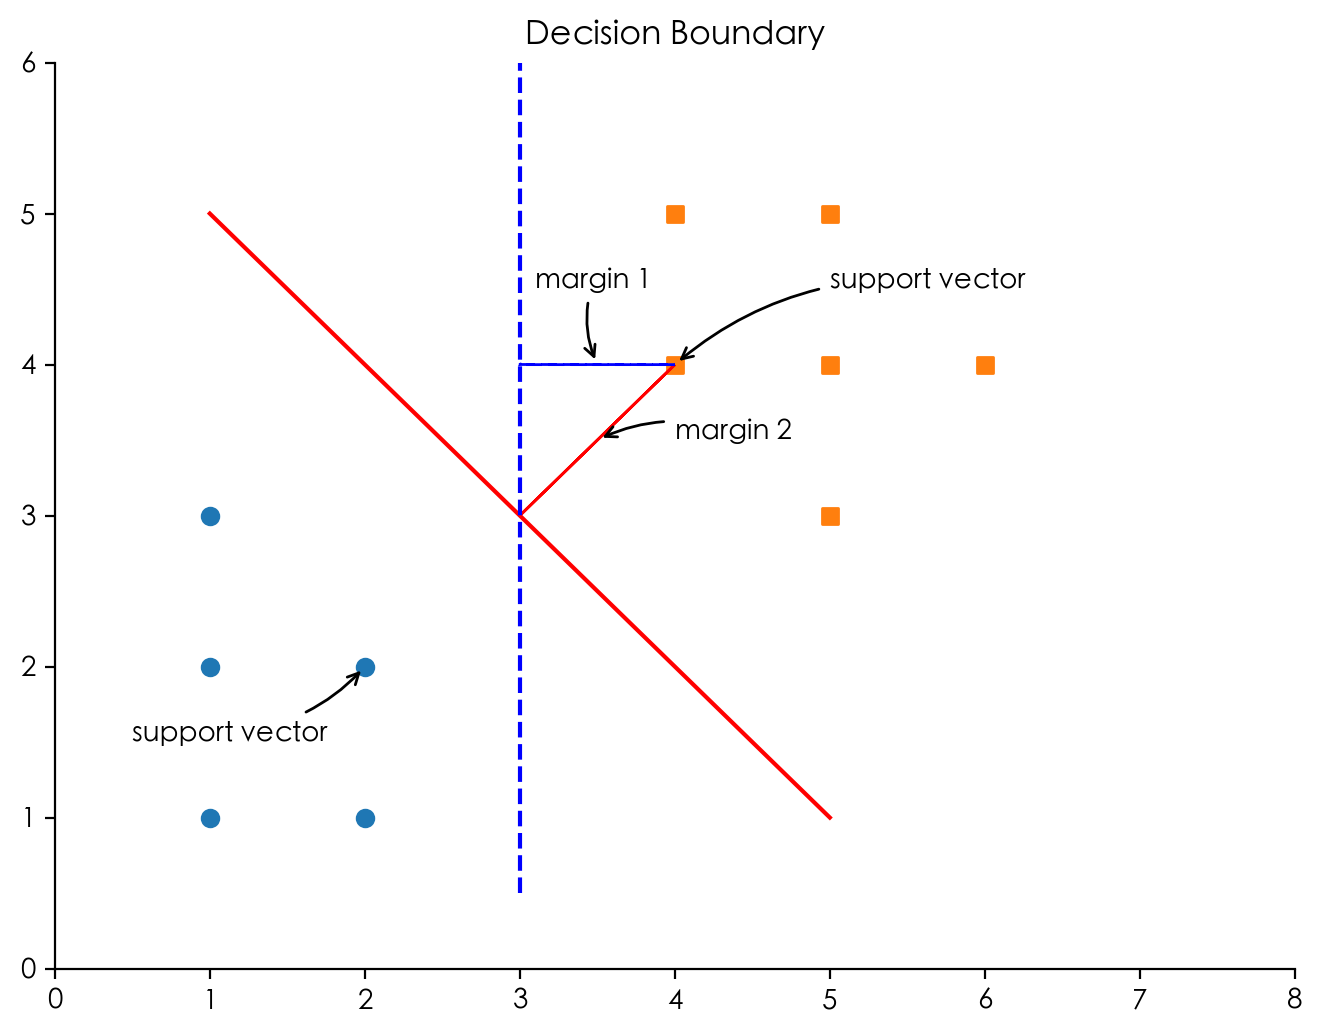

In [3]:
plt.figure(figsize=(8, 6), dpi=100)

plt.title('Decision Boundary')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
# 绘制决策边界
plt.plot([1, 5], [5, 1], '-r')

plt.arrow(4, 4, -1, -1, shape='full', color='r')
plt.plot([3, 3], [0.5, 6], '--b')
plt.arrow(4, 4, -1, 0, shape='full', color='b', linestyle='--')
plt.annotate(r'margin 1',
             xy=(3.5, 4), xycoords='data',
             xytext=(3.1, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'margin 2',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(4, 3.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(2, 2), xycoords='data',
             xytext=(0.5, 1.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

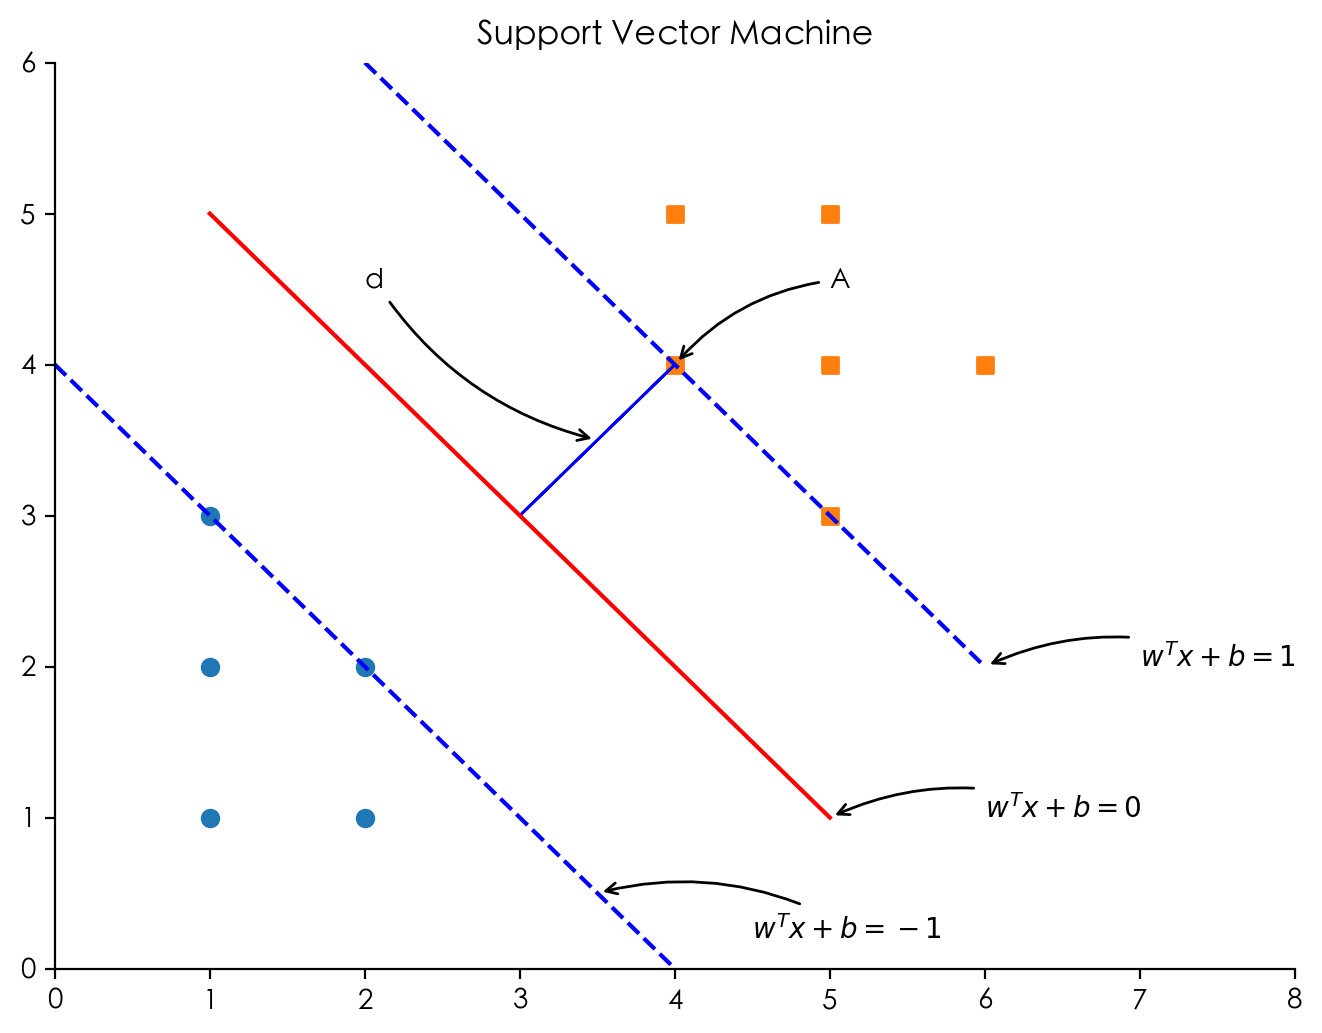

In [4]:
plt.figure(figsize=(8, 6), dpi=100)

plt.title('Support Vector Machine')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.plot([0, 4], [4, 0], '--b', [2, 6], [6, 2], '--b')
plt.arrow(4, 4, -1, -1, shape='full', color='b')
plt.annotate(r'$w^T x + b = 0$',
             xy=(5, 1), xycoords='data',
             xytext=(6, 1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = 1$',
             xy=(6, 2), xycoords='data',
             xytext=(7, 2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = -1$',
             xy=(3.5, 0.5), xycoords='data',
             xytext=(4.5, 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'd',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(2, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'A',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

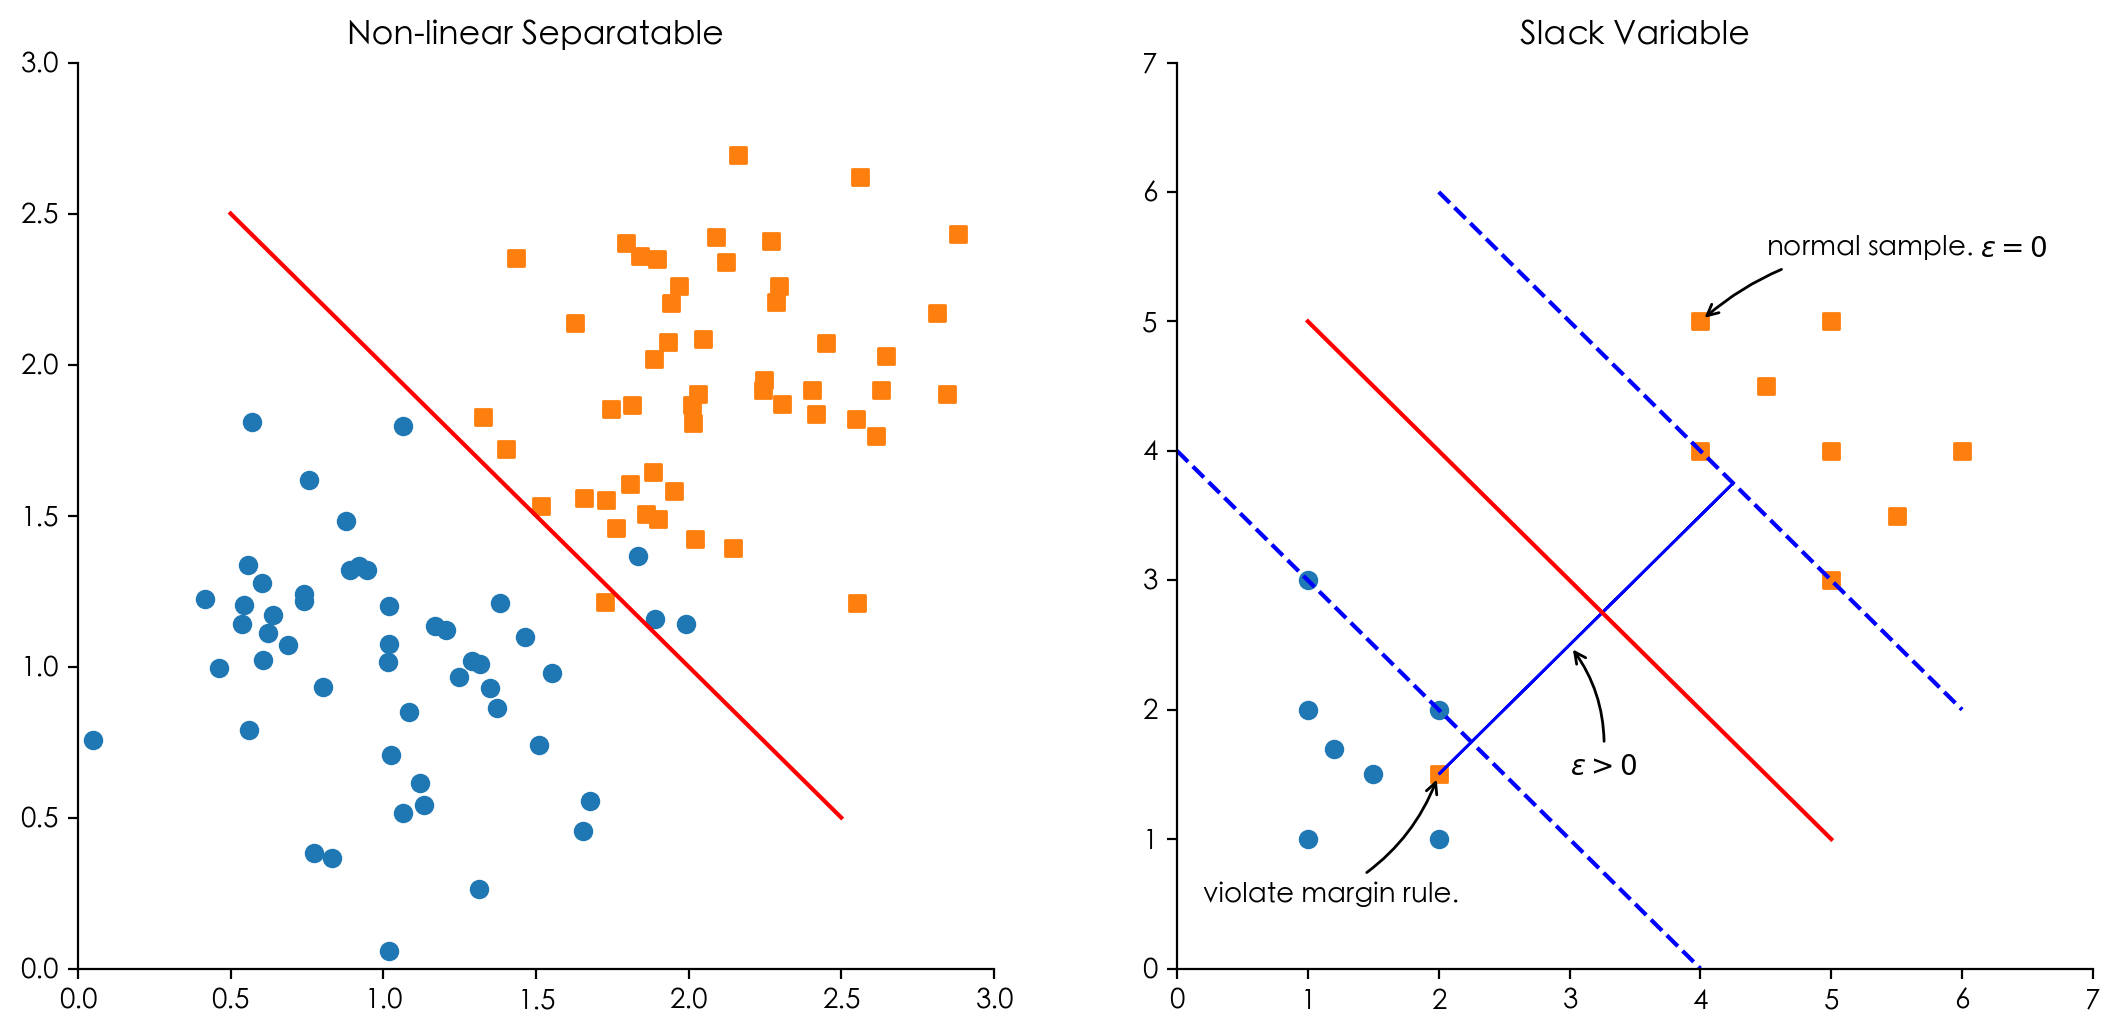

In [5]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(13, 6), dpi=100)

# sub plot 1
plt.subplot(1, 2, 1)

X, y = make_blobs(n_samples=100, 
                  n_features=2, 
                  centers=[(1, 1), (2, 2)], 
                  random_state=4, 
                  shuffle=False,
                  cluster_std=0.4)

plt.title('Non-linear Separatable')

plt.xlim(0, 3)
plt.ylim(0, 3)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='s')
plt.plot([0.5, 2.5], [2.5, 0.5], '-r')

# sub plot 2
plt.subplot(1, 2, 2)

class1 = np.array([[1, 1], [1, 3], [2, 1], [1, 2], [2, 2], [1.5, 1.5], [1.2, 1.7]])
class2 = np.array([[4, 4], [5, 5], [5, 4], [5, 3], [4, 5], [6, 4], [5.5, 3.5], [4.5, 4.5], [2, 1.5]])

plt.title('Slack Variable')

plt.xlim(0, 7)
plt.ylim(0, 7)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.plot([0, 4], [4, 0], '--b', [2, 6], [6, 2], '--b')
plt.arrow(2, 1.5, 2.25, 2.25, shape='full', color='b')
plt.annotate(r'violate margin rule.',
             xy=(2, 1.5), xycoords='data',
             xytext=(0.2, 0.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'normal sample. $\epsilon = 0$',
             xy=(4, 5), xycoords='data',
             xytext=(4.5, 5.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$\epsilon > 0$',
             xy=(3, 2.5), xycoords='data',
             xytext=(3, 1.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

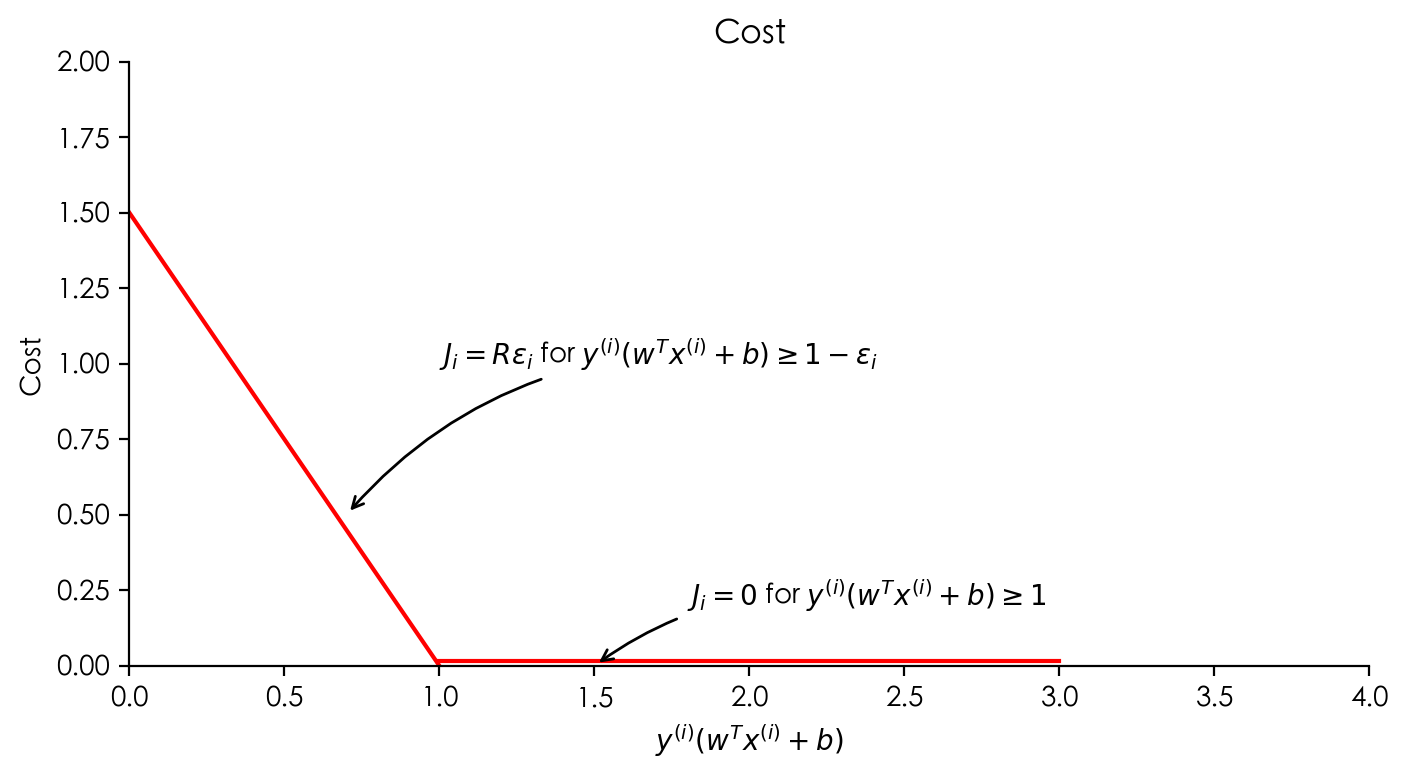

In [6]:
plt.figure(figsize=(8, 4), dpi=100)

plt.title('Cost')

plt.xlim(0, 4)
plt.ylim(0, 2)
plt.xlabel('$y^{(i)} (w^T x^{(i)} + b)$')
plt.ylabel('Cost')
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.plot([0, 1], [1.5, 0], '-r')
plt.plot([1, 3], [0.015, 0.015], '-r')
plt.annotate(r'$J_i = R \epsilon_i$ for $y^{(i)} (w^T x^{(i)} + b) \geq 1 - \epsilon_i$',
             xy=(0.7, 0.5), xycoords='data',
             xytext=(1, 1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$J_i = 0$ for $y^{(i)} (w^T x^{(i)} + b) \geq 1$',
             xy=(1.5, 0), xycoords='data',
             xytext=(1.8, 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

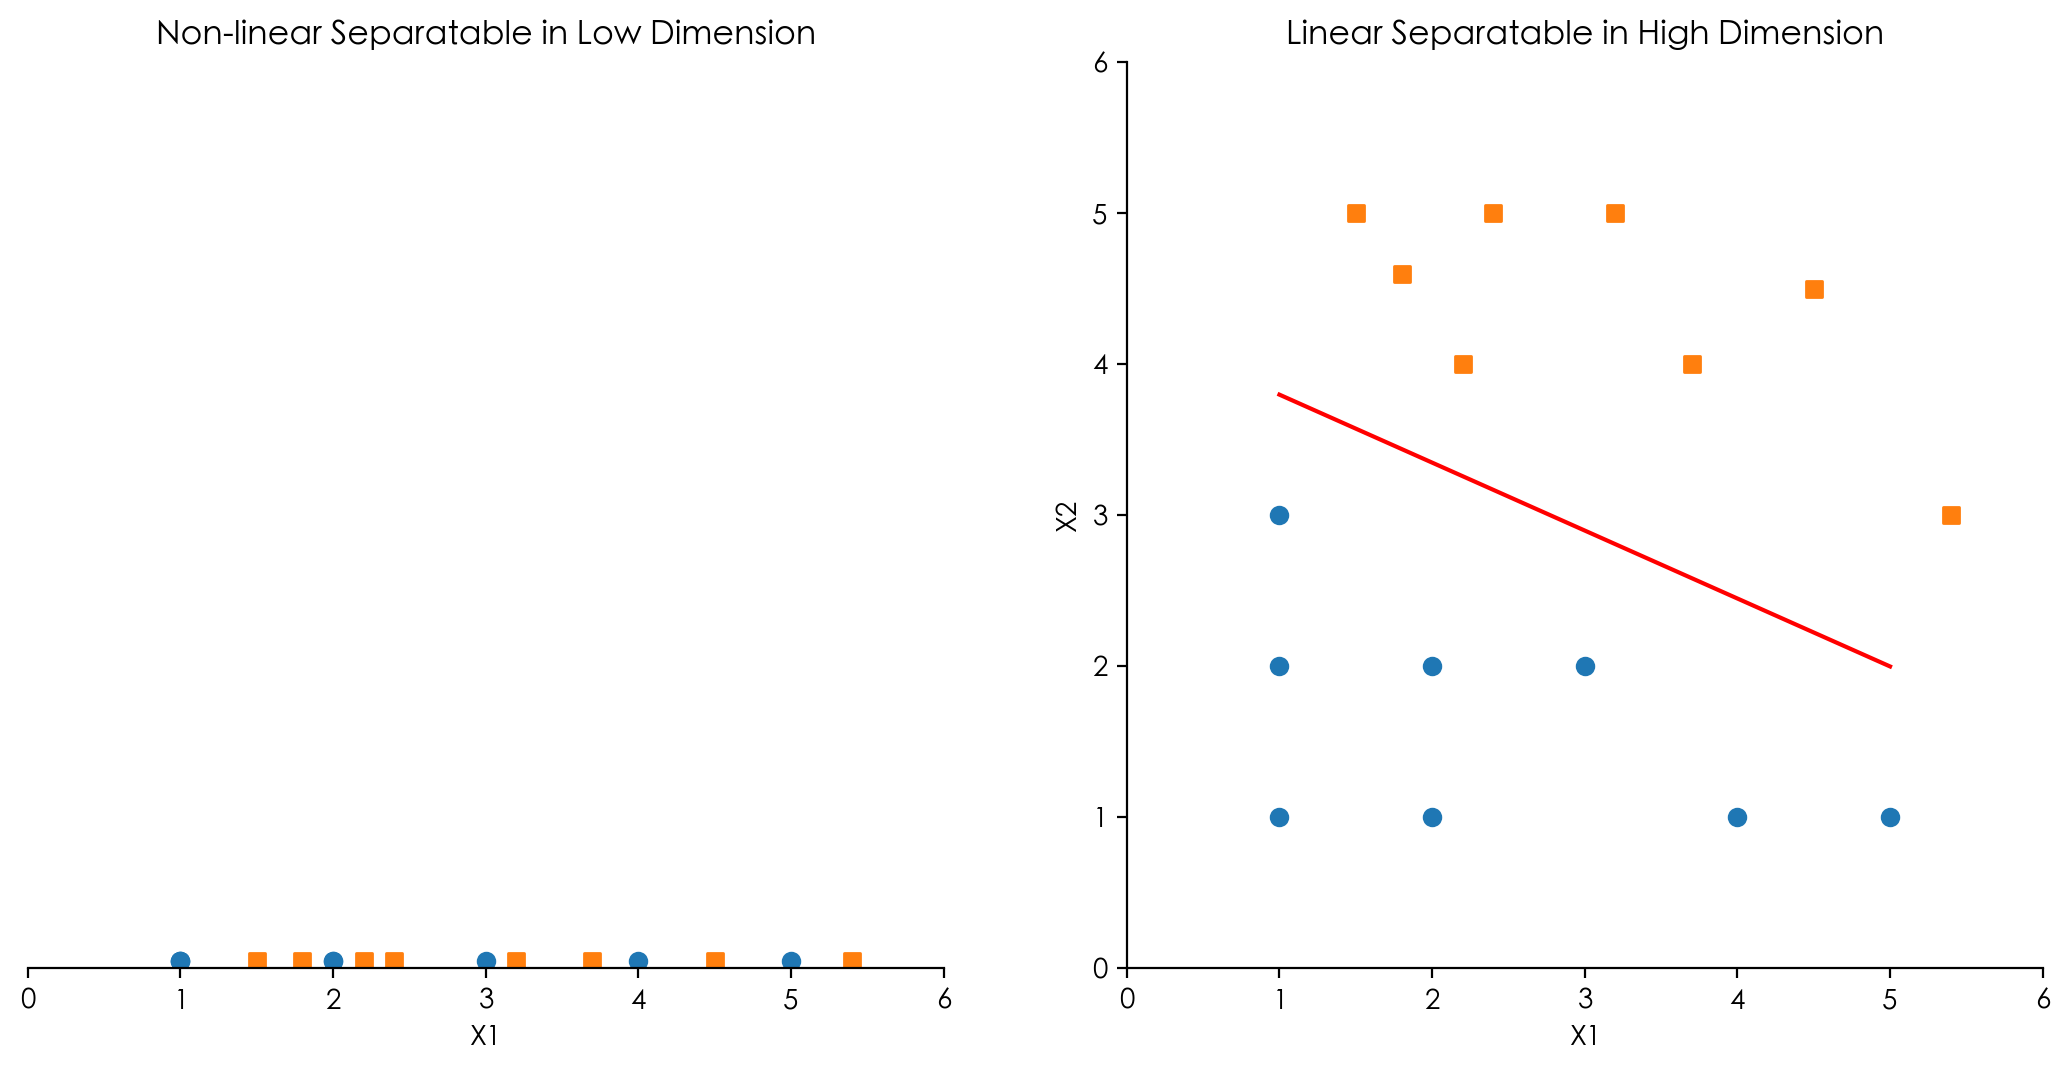

In [7]:
plt.figure(figsize=(13, 6), dpi=100)

class1 = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [3, 2], [4, 1], [5, 1]])
class2 = np.array([[2.2, 4], [1.5, 5], [1.8, 4.6], [2.4, 5], [3.2, 5], [3.7, 4], [4.5, 4.5], [5.4, 3]])

# sub plot 1
plt.subplot(1, 2, 1)

plt.title('Non-linear Separatable in Low Dimension')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.yticks(())
plt.xlabel('X1')
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')

plt.scatter(class1[:, 0], np.zeros(class1[:, 0].shape[0]) + 0.05, marker='o')
plt.scatter(class2[:, 0], np.zeros(class2[:, 0].shape[0]) + 0.05, marker='s')

# sub plot 2
plt.subplot(1, 2, 2)

plt.title('Linear Separatable in High Dimension')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('X1')
plt.ylabel('X2')
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [3.8, 2], '-r')

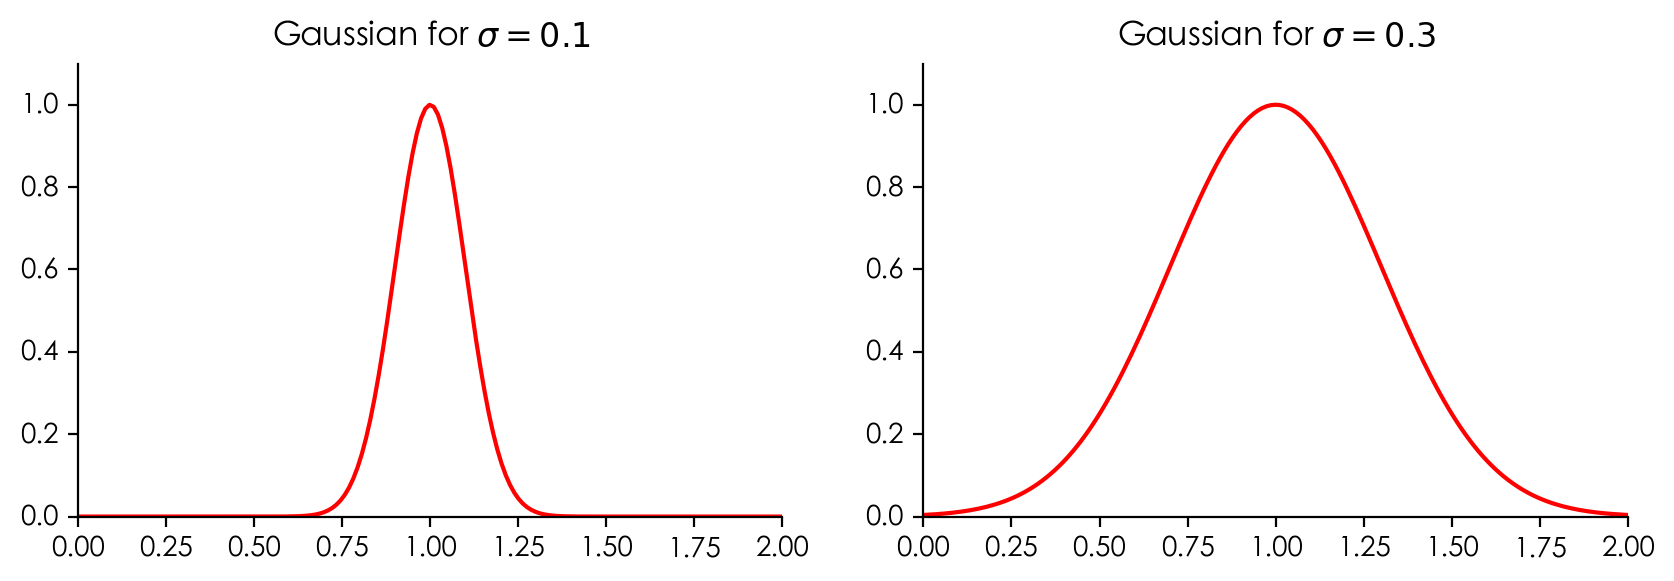

In [8]:
def gaussian_kernel(x, mean, sigma):
    return np.exp(- (x - mean)**2 / (2 * sigma**2))

x = np.linspace(0, 6, 500)
mean = 1
sigma1 = 0.1
sigma2 = 0.3

plt.figure(figsize=(10, 3), dpi=100)

# sub plot 1
plt.subplot(1, 2, 1)
plt.title('Gaussian for $\sigma={0}$'.format(sigma1))

plt.xlim(0, 2)
plt.ylim(0, 1.1)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.plot(x, gaussian_kernel(x, mean, sigma1), 'r-')

# sub plot 2
plt.subplot(1, 2, 2)
plt.title('Gaussian for $\sigma={0}$'.format(sigma2))

plt.xlim(0, 2)
plt.ylim(0, 1.1)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.plot(x, gaussian_kernel(x, mean, sigma2), 'r-')